# 基于minist数据集的家电异音检测

此项目是使用深度学习对洗衣机异音进行检测，从而实现自动对故障家电与正常家电进行2分类的目的.
## 使用工具

1、程序语言：python 

2、IDE：pycharm

3、深度学习框架：Tensorflow

4、matlab

## 步骤

### 采集数据，BK套件采集。
    采集物件：洗衣机
    采集环境：正常音在生产线上（声音较嘈杂），异常音在稳定的室内（非消声室）
    采集设备：4189电容式传感器、数据采集系统BK3560-B、PULSE软件
    信号参数：SignalUnit:Pa ，带宽25.6k、采样频率=2.56*带宽=65536Hz
    
    正常音和异常音数据采用：
normal：

	-- 20171030海尔洗衣机生产线数据处理\no_3关盖脱水噪声跟着生产线走
	-- 20171030海尔洗衣机生产线数据处理\no_4关盖脱水噪声跟着生产线走（远中近）

	-- 20171030海尔洗衣机生产线数据处理\no_6洗涤测试


abnormal：

	-- 20171030海尔洗衣机实验室数据处理\no_2脱水状态（第二台听着不舒服样机）   
	--20171030海尔洗衣机实验室数据处理\no_9关盖脱水电机异常声（电机异常声样机]）


	-- 20171030海尔洗衣机实验室数据处理\no_8洗涤电机异常声
	-- 20171030海尔洗衣机实验室数据处理\no_10洗涤声有问题
	-- 20171030海尔洗衣机实验室数据处理\no_101洗涤声有问题58-60

### 准备mat格式数据（采样频率65536Hz，每个mat约为3秒左右）, 处理软件：PULSE.12.6.Labshop

    train:正常数据（89个）和异常数据（103个），自己排好号，好为matlab读取方便
    
    test: 正常数据（27个）和异常数据（21个），排号

MATLAB中可执行sound(Channel_1_Data, 65536)简单听下正常音和异常音的区别。

### 信号特征分析
由于用机器学习or深度学习，让算法自己学习特征即可。自己也对数据做了分帧加窗，看02-建立minist训练数据集\信号分析。

对信号数据保存成pcm文件，放到语谱图：

    fid=fopen('D:\normal.pcm','wb');%存为raw，也就是pcm格式
    fwrite(fid,Channel_1_Data,'double');

### 建立minist训练数据集，分为时域和频域
    t10k-images-idx3-ubyte.gz、
    t10k-labels-idx1-ubyte.gz、
    train-images-idx3-ubyte.gz、
    train-labels-idx1-ubyte.gz
    四个文件分别是测试集、测试集的标签集、训练集、训练集的标签集


建立minist训练数据集\code中的两个.m文件是处理原始数据所用程序，将原始数据处理生成二进制文件：

    test_program.m    生成测试集及其标签
    train_program.m   生成训练集及其标签
    
用时域数据，250个数据作为一个sample，制作minist数据集    

## 代码
### 深度学习：模型的是参考Mnist手写体识别的模型

    noise_deep_train.py -- 该程序是使用卷积神经网络(三层cnn,2个fc),对数据经行训练并给出测试集预测结果，可以保存模型
    noise_deep_load.py  -- 加载保存的卷积神经网络模型，无需训练，输出结果是一个测试集的准确率，并给出正样本的查准率precision和查全率recall
    swallowsound_input_data.py -- 该程序是用来导入训练集，单独封装成一个模块可供其他模块调用，提高代码的重复使用率
    
    3_cnn:该文件夹中存放的是训练时存放的数据，可加载模型，直接进行预测。
    logs：该文件夹里存放了训练过程中保存的可视化文件，在terminal中运行：tensorboard  --logdir=D:\pycharm\swallowsound\swallowsound\logs\ 后可按照提示即可在浏览器中看到可视化内容


### 机器学习
    function_import.py  -- 函数导入部分

    noise_SVM.py -- svc模型，参数调优
    noise_knn.py -- k近邻模型，参数调优
    noise_RandomForest.py -- 随机森林模型，参数调优
    noise_NaiveBayes.py -- 朴素贝叶斯模型，参数调优
    noise_AdaBoost.py -- AdaBoost模型，参数调优
    noise_GBDT.py -- GBDT模型，参数调优
    noise_XGBoost.py -- XGBoost模型，参数调优

    model_all.py -- 所有模型的训练，预测，评估（通过前面多个模型网格搜索找合适的参数，重新训练模型）
    figure_all.py  -- 将所有模型的准确率，precision，recall画图
    
    parameters: 该文件夹放置的是模型通过网格搜索的最好的参数

In [ ]:
8种模型按照Accuracy排序
Comparison of accuracy, precision and recall rate between different classifiers

          Model  Accuracy  precision   recall
7    deep_3conv   0.96119     0.9900  0.92900
6       XGBoost   0.92000     0.9485  0.88500
5          GBDT   0.91570     0.9611  0.86310
2  RandomForest   0.90950     0.9350  0.87600
4      AdaBoost   0.90140     0.9345  0.85929
0           svm   0.85500     0.9050  0.78700
1           knn   0.74090     0.8617  0.56230
3    NaiveBayes   0.69700     0.8460  0.46800

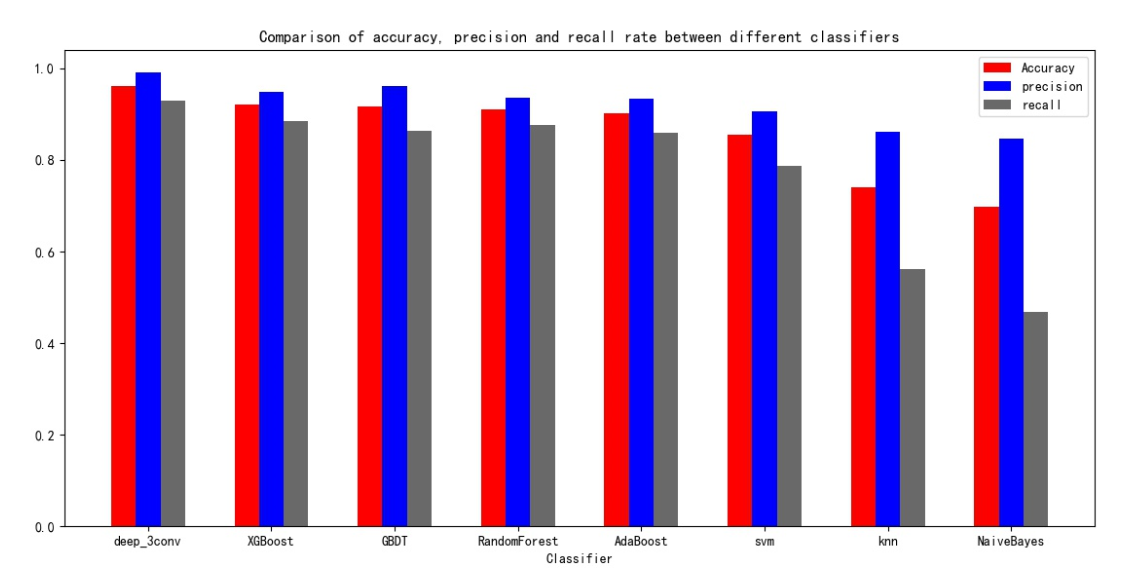

结论：对该数据集，深度学习的准确率约为96%，precision，recall都是所有模型中最高的。其次，XGBoost，GBDT，RandomForest，AdaBoost的预测准确率较为接近，且超过90%以上。knn较差，朴素贝叶斯模型最差。